<a href="https://colab.research.google.com/github/Cventurelli/UDD-C4-DS-PROYECTO-7/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

En primera instancia se realiza un análisis exploratorio preliminar de datos (EDA) para un conjunto de datos ubicado en un directorio específico. El código verifica si el directorio existe y, en caso afirmativo, enumera su contenido (archivos y subdirectorios).

In [ ]:
import os

# Print Directorio de trabajo actual
print("Directorio de trabajo actual:", os.getcwd())

# Actualiza la ruta si es necesario
path = base_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA' #Asegúrate de que esta sea la ruta correcta

# Compruebe si el directorio existe antes de enumerar su contenido.
if os.path.exists(path):
    print(os.listdir(path))
else:
    print("Directorio no encontrado. Por favor revisa la ruta.")

Directorio de trabajo actual: /content
['val', 'test', 'train']


Revisamos cuales son las clases que presentas estos directorios.

In [ ]:

import os

# 1. Definir la ruta base del directorio
base_dir ='/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA'
# 2. Crear rutas para los directorios de entrenamiento, validación y prueba
test_dir, train_dir, validation_dir = [
os.path.join(base_dir, dir)
for dir in ('test','train', 'val')
]
# Ahora puedes listar los archivos en cada directorio
for file in os.listdir(train_dir):
    # ...
    print(file)

PNEUMONIA
NORMAL


Revisamos por separado en cada uno de los directorios, y vemos de manera aleatoria archivos de imagnes de Rayos-X guardados en cada directorio 'tes', 'train' y 'val'

Imágenes de entrenamiento:


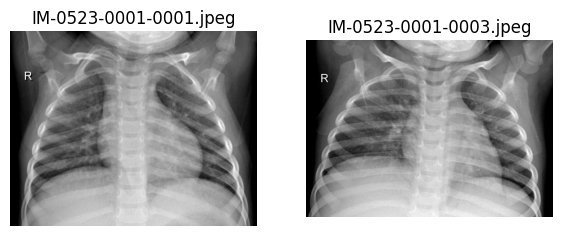

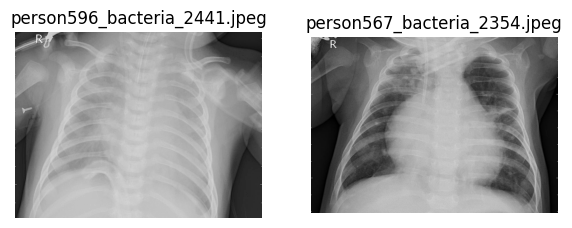

Imágenes de validación:


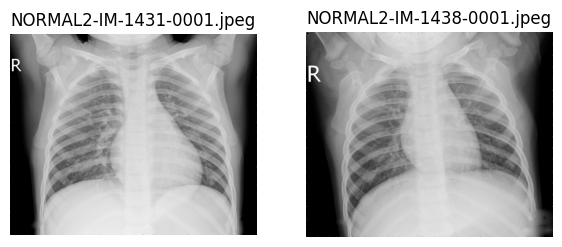

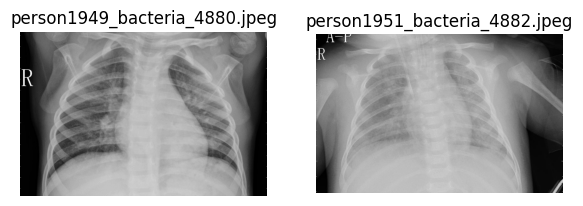

Imágenes de prueba:


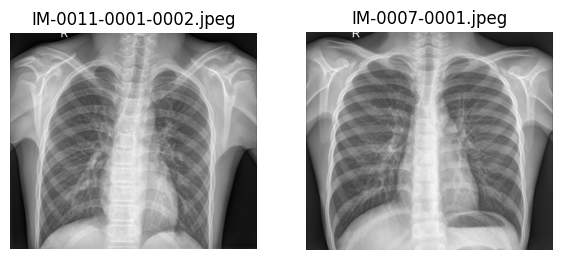

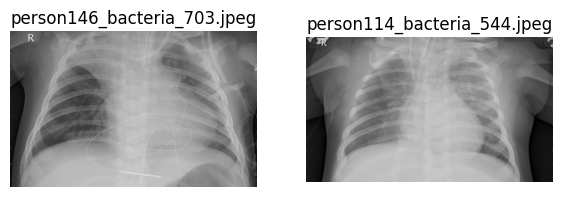

In [8]:
import os
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA'

# Crear rutas para los directorios de entrenamiento, validación y prueba
train_dir, validation_dir, test_dir = [
    os.path.join(base_dir, dir)
    for dir in ('train', 'val', 'test')
]

# Función para mostrar imágenes de un directorio
def show_images(directory, num_images=2):
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))] # Filter for files only
    image_paths = image_paths[:num_images]
    plt.figure(figsize=(7, 7))
    for i, image_path in enumerate(image_paths):
        plt.subplot(1, num_images, i+1)
        plt.imshow(plt.imread(image_path), cmap='gray')
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.show()

# Mostrar imágenes de cada directorio
print("Imágenes de entrenamiento:")
show_images(os.path.join(train_dir, 'NORMAL')) # Specify a subdirectory containing images
show_images(os.path.join(train_dir, 'PNEUMONIA'))

print("Imágenes de validación:")
show_images(os.path.join(validation_dir, 'NORMAL')) # Specify a subdirectory containing images
show_images(os.path.join(validation_dir, 'PNEUMONIA'))

print("Imágenes de prueba:")
show_images(os.path.join(test_dir, 'NORMAL')) # Specify a subdirectory containing images
show_images(os.path.join(test_dir, 'PNEUMONIA'))

Se realiza un análisis exploratorio preliminar (EDA) de un conjunto de imágenes médicas que se clasifican en dos categorías: "NEUMONÍA" y "NORMAL". El EDA se enfoca en la estructura del conjunto de datos, la cantidad de imágenes en cada categoría y la distribución de las imágenes entre los directorios de entrenamiento, validación y prueba.

In [9]:
# 3. Imprimir la información de cada archivo en cada directorio
total_images_train = sum(len([f for f in os.listdir(os.path.join(train_dir, file)) if os.path.isfile(os.path.join(train_dir, file, f))]) for file in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, file)))
print(f"Directorio train: ({total_images_train} imágenes)")
for file in os.listdir(train_dir):
    file_path = os.path.join(train_dir, file)
    if os.path.isdir(file_path):  # Verificar si es un directorio
        num_images = len([f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))])  # Contar el número de archivos en el directorio
        print(f"Carpeta: {file}, Número de imágenes: {num_images}")
    else:
        print(f"Archivo: {file}, Tamaño: {os.path.getsize(file_path)} bytes")

total_images_val = sum(len([f for f in os.listdir(os.path.join(validation_dir, file)) if os.path.isfile(os.path.join(validation_dir, file, f))]) for file in os.listdir(validation_dir) if os.path.isdir(os.path.join(validation_dir, file)))
print(f"\nDirectorio val: ({total_images_val} imágenes)")
for file in os.listdir(validation_dir):
    file_path = os.path.join(validation_dir, file)
    if os.path.isdir(file_path):  # Verificar si es un directorio
        num_images = len([f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))])  # Contar el número de archivos en el directorio
        print(f"Carpeta: {file}, Número de imágenes: {num_images}")
    else:
        print(f"Archivo: {file}, Tamaño: {os.path.getsize(file_path)} bytes")

total_images_test = sum(len([f for f in os.listdir(os.path.join(test_dir, file)) if os.path.isfile(os.path.join(test_dir, file, f))]) for file in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, file)))
print(f"\nDirectorio test: ({total_images_test} imágenes)")
for file in os.listdir(test_dir):
    file_path = os.path.join(test_dir, file)
    if os.path.isdir(file_path):  # Verificar si es un directorio
        num_images = len([f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))])  # Contar el número de archivos en el directorio
        print(f"Carpeta: {file}, Número de imágenes: {num_images}")
    else:
        print(f"Archivo: {file}, Tamaño: {os.path.getsize(file_path)} bytes")

Directorio train: (5216 imágenes)
Carpeta: PNEUMONIA, Número de imágenes: 3875
Carpeta: NORMAL, Número de imágenes: 1341

Directorio val: (16 imágenes)
Carpeta: PNEUMONIA, Número de imágenes: 8
Carpeta: NORMAL, Número de imágenes: 8

Directorio test: (624 imágenes)
Carpeta: NORMAL, Número de imágenes: 234
Carpeta: PNEUMONIA, Número de imágenes: 390


Se representa de forma gráfica el conjunto de imágenes médicas que se clasifica en dos categorías: "NEUMONÍA" y "NORMAL", los datos, la cantidad de imágenes en cada categoría y la distribución de las imágenes entre los directorios de entrenamiento, validación y prueba.

Se aprecia un desbalance en 2 de los direcciorios , tanto entrenamiento y prueba, 'trai' y 'test'.

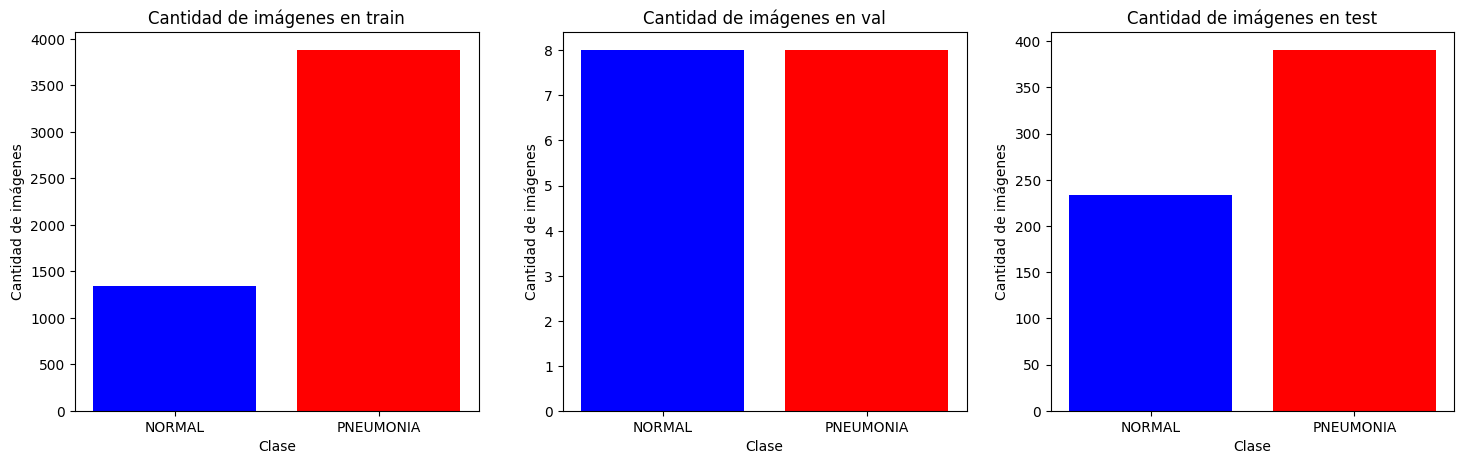

In [10]:
import os
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA'

# Crear rutas para los directorios de entrenamiento, validación y prueba
train_dir, validation_dir, test_dir = [
    os.path.join(base_dir, dir)
    for dir in ('train', 'val', 'test')
]

# Función para contar imágenes en un directorio
def count_images(directory):
    normal_images = len(os.listdir(os.path.join(directory, 'NORMAL')))
    pneumonia_images = len(os.listdir(os.path.join(directory, 'PNEUMONIA')))
    return normal_images, pneumonia_images

# Contar imágenes en cada directorio
train_normal, train_pneumonia = count_images(train_dir)
validation_normal, validation_pneumonia = count_images(validation_dir)
test_normal, test_pneumonia = count_images(test_dir)

# Graficar resultados por directorio
directories = [train_dir, validation_dir, test_dir]
labels = ['NORMAL', 'PNEUMONIA']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, directory in enumerate(directories):
    normal_images, pneumonia_images = count_images(directory)
    axs[i].bar(labels, [normal_images, pneumonia_images], color=['blue', 'red'])
    axs[i].set_xlabel('Clase')
    axs[i].set_ylabel('Cantidad de imágenes')
    axs[i].set_title(f'Cantidad de imágenes en {os.path.basename(directory)}')

plt.tight_layout(pad=2.0)
plt.show()

Guardamos las rutas de cada folder

In [11]:
# Obtenemos la ruta de acceso a los conjuntos de datos
train_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train'
val_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/val'
test_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test'